In [91]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

img = ndimage.imread('peppers.png')
img_gray = ndimage.imread('peppers.png', mode='L')

# ======== smoothing filters ========


# ======== average filter ========
f1_weights = np.ones((25, 1))
f1_weights = f1_weights / np.sum(f1_weights)
np.set_printoptions(threshold=10)
print(f1_weights)
print('Suma elementelor pt filtrul de medie 1: ' + str(np.sum(f1_weights)))
print('===============')

f2_weights = np.ones((1, 25))
f2_weights = f2_weights / np.sum(f2_weights)
print(f2_weights)
print('Sume elementelor pt filtrul de medie 2: ' + str(np.sum(f2_weights)))
print('===============')

f3_weights = np.ones((25, 25))
f3_weights = f3_weights / np.sum(f3_weights)
np.set_printoptions(threshold=100)
print(f3_weights)
print('Sume elementelor pt filtrul de medie 2: ' + str(np.sum(f3_weights)))
print('===============')

[[ 0.04]
 [ 0.04]
 [ 0.04]
 ..., 
 [ 0.04]
 [ 0.04]
 [ 0.04]]
Suma elementelor pt filtrul de medie 1: 1.0
[[ 0.04  0.04  0.04 ...,  0.04  0.04  0.04]]
Sume elementelor pt filtrul de medie 2: 1.0
[[ 0.0016  0.0016  0.0016 ...,  0.0016  0.0016  0.0016]
 [ 0.0016  0.0016  0.0016 ...,  0.0016  0.0016  0.0016]
 [ 0.0016  0.0016  0.0016 ...,  0.0016  0.0016  0.0016]
 ..., 
 [ 0.0016  0.0016  0.0016 ...,  0.0016  0.0016  0.0016]
 [ 0.0016  0.0016  0.0016 ...,  0.0016  0.0016  0.0016]
 [ 0.0016  0.0016  0.0016 ...,  0.0016  0.0016  0.0016]]
Sume elementelor pt filtrul de medie 2: 1.0


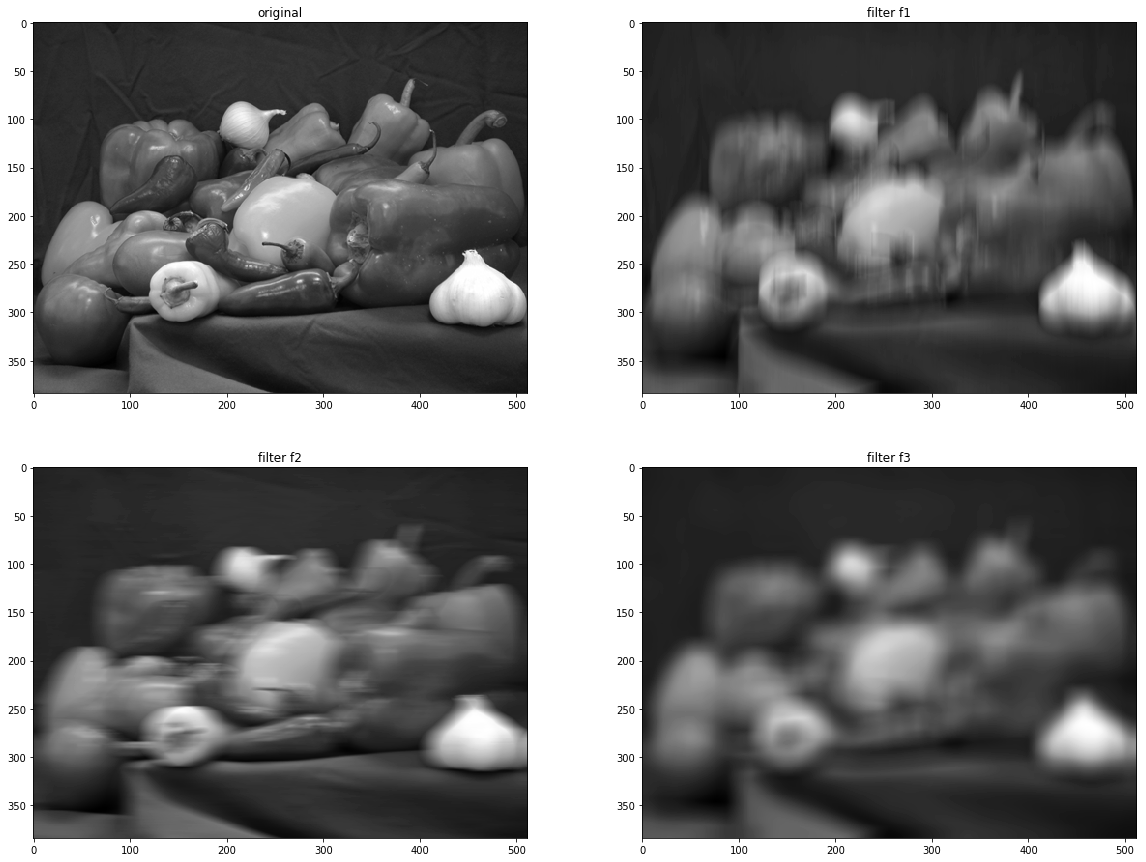

In [89]:
# applying the filters on gray images
img_gray1 = ndimage.convolve(img_gray, f1_weights)
img_gray2 = ndimage.convolve(img_gray, f2_weights)
img_gray3 = ndimage.convolve(img_gray, f3_weights)
# displaying the results
plt.figure(figsize = (20, 15))

plt.subplot(221)
plt.title('original')
plt.imshow(img_gray, 'gray')

plt.subplot(222)
plt.title('filter f1')
plt.imshow(img_gray1, 'gray')

plt.subplot(223)
plt.title("filter f2")
plt.imshow(img_gray2, 'gray')

plt.subplot(224)
plt.title('filter f3')
plt.imshow(img_gray3, 'gray')

plt.show()

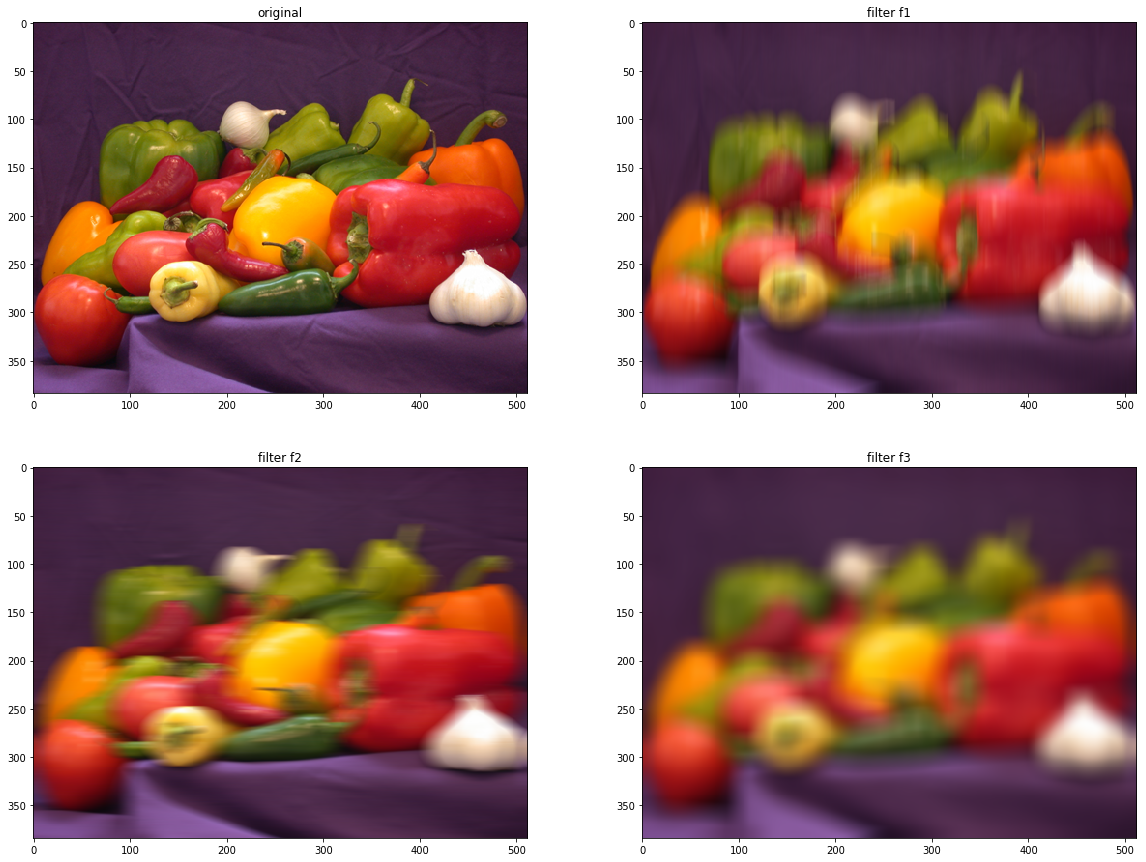

In [93]:
# applying filters on color images
# we take hold of view for each color band (TODO ask for advice)
img1 = [ndimage.convolve(img[:,:,band], f1_weights) for band in range(3)]
img1 = np.stack(img1, axis=2)
img2 = [ndimage.convolve(img[:,:,band], f2_weights) for band in range(3)]
img2 = np.stack(img2, axis=2)
img3 = [ndimage.convolve(img[:,:,band], f3_weights) for band in range(3)]
img3 = np.stack(img3, axis=2)
# displaying the results

plt.figure(figsize = (20, 15))

plt.subplot(221)
plt.title('original')
plt.imshow(img)

plt.subplot(222)
plt.title('filter f1')
plt.imshow(img1)

plt.subplot(223)
plt.title("filter f2")
plt.imshow(img2)

plt.subplot(224)
plt.title('filter f3')
plt.imshow(img3)

plt.show()

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]


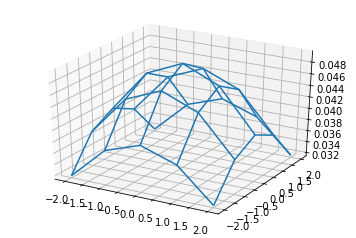

In [140]:
# ======== gaussian filter ========
# generates gausian kernel of size 2*size + 1 with sigma std
# ex: when size is 1, it returns a (3, 3) array
def gaussian_kernel (size, sigma) :
    xy_coords = np.linspace(-size, size, 2*size+1)
    xv, yv = np.meshgrid(xy_coords, xy_coords)
    
    kernel = np.exp(-(xv ** 2 + yv ** 2) / (2 * sigma ** 2))
    kernel = kernel / np.sum(kernel)
    
    return kernel
    
from mpl_toolkits.mplot3d import axes3d
    
size = 2
f = gaussian_kernel(size, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xv = np.linspace(-size, size, 2*size+1)
xv, yv = np.meshgrid(xv, xv)
print(xv)
ax.plot_wireframe(xv, yv, f)

plt.show()